<a href="https://colab.research.google.com/github/Sulaiman-Alam/Build-Project-2024/blob/main/Updated_Alam%2C_Sulaiman_a0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Git and Drive Integration

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import time

### Mount google drive

In [ ]:
# Mount google drive to use a persistent directory structure
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Clone the assignment repository

In [ ]:
# Create a directory for the course
%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545

# Create files to hold your Github token and username.
!echo 'YOUR_TOKEN' > /content/gdrive/MyDrive/ece5545/token.txt
!echo 'YOUR_HANDLE' > /content/gdrive/MyDrive/ece5545/git_username.txt

# TODO: Navigate to the created files and replace the contents with your token and username.
# Do NOT place your token inside of the notebook. This way there is no risk that you will push it to your repo.
# Never share your token with anyone, it is basically your github password!

/content/gdrive/MyDrive/ece5545


In [ ]:
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
    handle = f.readline().strip()

YOUR_TOKEN = token
YOUR_HANDLE = handle

!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a0-{YOUR_HANDLE}.git a0

Cloning into 'a0'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 37 (delta 1), reused 5 (delta 0), pack-reused 28 (from 1)
Receiving objects: 100% (37/37), 17.96 KiB | 17.96 MiB/s, done.
Resolving deltas: 100% (8/8), done.


### Add `src` directory to the Python import path

In [ ]:
# import functions from the src directory in repo
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/ece5545/a0/src')

### Import functions from `src/train_utils.py`

In [ ]:
import train_utils
from model import *

### Make changes to `src` files and push to repo

In [ ]:
# You will likely need to set your git user identification settings
!git config --global user.email "sa2459@cornell.edu"  # update with your email
!git config --global user.name "Sulaiman Alam"   # update with your name

In [ ]:
# To run the same tests that are run on Github Classroom
%cd /content/gdrive/MyDrive/ece5545/a0
!python3 -m pytest

/content/gdrive/MyDrive/ece5545/a0
============================= test session starts ==============================
platform linux -- Python 3.12.12, pytest-8.4.2, pluggy-1.6.0
rootdir: /content/gdrive/MyDrive/ece5545/a0
plugins: anyio-4.12.1, typeguard-4.4.4, langsmith-0.6.6
collected 1 item                                                               

tests/test_model.py .                                                    [100%]

============================== 1 passed in 5.40s ===============================


In [ ]:
%cd /content/gdrive/MyDrive/ece5545/a0/src
# Navigate to a0/src/model.py and fix the bug (denoted by TODO)
# in the file then commit the changes below
!git commit -am "fixed bug in model.py"
!git push

/content/gdrive/MyDrive/ece5545/a0/src
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/
	../tests/__pycache__/

nothing added to commit but untracked files present (use "git add" to track)
To https://github.com/ML-HW-SYS/a0-Sulaiman-Alam.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/ML-HW-SYS/a0-Sulaiman-Alam.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


## Training Configuration

In [ ]:
batch_size = 128
epochs = 5
lr = 1.0
gamma = 0.7
no_cuda = False
seed = 42
log_interval = 50
save_model = False
dry_run = False

# Derived parameters
use_cuda = not no_cuda and torch.cuda.is_available()
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

## Data Loaders and Optimizer Setup

In [ ]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('/content/gdrive/MyDrive/ece5545/data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('/content/gdrive/MyDrive/ece5545/data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=lr)

scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

## Training Loop

In [ ]:
import importlib
importlib.reload(train_utils)
# we use importlib to make sure that we are loading
# the latest version of train_utils after any changes
# that you may have done

for epoch in range(1, epochs + 1):
    train_utils.train(model, device, train_loader, optimizer, epoch, log_interval, dry_run)
    train_utils.test(model, device, test_loader)
    scheduler.step()

if save_model:
    torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.316613
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.344936
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.209250
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.173686
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.148064
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.134009
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.134957
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.042865
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.150823
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.097593

Epoch 1 time = 17.21s on device cuda

Test set: Average loss: 0.0473, Accuracy: 9844/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.054383
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.032518
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.105462
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.103838
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.085270
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.021489
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.045736
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.052586
Train Epoch: 

In [ ]:
for epoch in range(epochs + 1, epochs + 5):
    train_utils.train(model, device, train_loader, optimizer, epoch, log_interval, dry_run)
    train_utils.test(model, device, test_loader)
    scheduler.step()

if save_model:
    torch.save(model.state_dict(), "mnist_cnn.pt")

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.030728
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.009830
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.012186
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.066127
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.005261
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.020907
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.038614
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.005425
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.022880
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.016455

Epoch 6 time = 15.81s on device cuda

Test set: Average loss: 0.0277, Accuracy: 9912/10000 (99%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.056566
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.011305
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.091366
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.017378
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.010837
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.040466
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.030665
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.035407
Train Epoch: 

In [ ]:
%cd /content/gdrive/MyDrive/ece5545/a0/src
# in the file then commit the changes below
# use the following commands when pushing changes to the github!
!git pull
!git add .
!git commit -am "added more test cases for epoch"
!git push

/content/gdrive/MyDrive/ece5545/a0/src
Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../tests/__pycache__/

nothing added to commit but untracked files present (use "git add" to track)
Everything up-to-date


In [ ]:
# Diagnostic information about the used GPU device
!nvidia-smi

Sat Jan 31 23:08:03 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
batch_sizes = [32, 64, 128, 256, 512]

cpu_times = []
gpu_times = []

cpu_device = torch.device("cpu")
gpu_device = torch.device("cuda")

def time_one_epoch(batch_size, device):
    train_kwargs = {'batch_size': batch_size, 'shuffle': True}
    if device.type == 'cuda':
        train_kwargs.update({'num_workers': 1, 'pin_memory': True})

    train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)

    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=lr)

    if device.type == 'cuda':
        torch.cuda.synchronize()

    start_time = time.time()

    train_utils.train(
        model,
        device,
        train_loader,
        optimizer,
        epoch=1,
        log_interval=999999,
        dry_run=False
    )

    if device.type == 'cuda':
        torch.cuda.synchronize()

    return time.time() - start_time

for bs in batch_sizes:
    print(f"Batch size {bs} (GPU)")
    gpu_times.append(time_one_epoch(bs, gpu_device))

    print(f"Batch size {bs} (CPU)")
    cpu_times.append(time_one_epoch(bs, cpu_device))

Batch size 32 (GPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.360342

Epoch 1 time = 21.87s on device cuda
Batch size 32 (CPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.332252

Epoch 1 time = 180.91s on device cpu
Batch size 64 (GPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.326302

Epoch 1 time = 17.71s on device cuda
Batch size 64 (CPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.326208

Epoch 1 time = 154.43s on device cpu
Batch size 128 (GPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308596

Epoch 1 time = 15.68s on device cuda
Batch size 128 (CPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308085

Epoch 1 time = 146.92s on device cpu
Batch size 256 (GPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302755

Epoch 1 time = 14.96s on device cuda
Batch size 256 (CPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.318889

Epoch 1 time = 170.82s on device cpu
Batch size 512 (GPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306326

Epoch 1 time = 13.77s on device cuda
Batch size 512 (CPU)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.292530

E

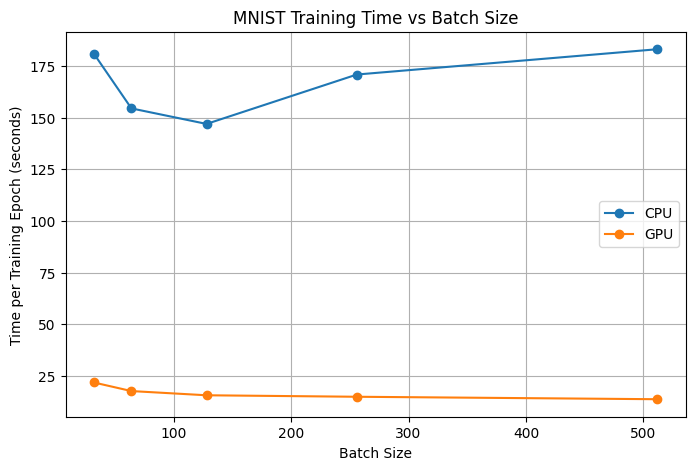

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(batch_sizes, cpu_times, marker='o', label='CPU')
plt.plot(batch_sizes, gpu_times, marker='o', label='GPU')

plt.xlabel("Batch Size")
plt.ylabel("Time per Training Epoch (seconds)")
plt.title("MNIST Training Time vs Batch Size")
plt.legend()
plt.grid(True)

plt.show()

In [24]:
%cd /content/gdrive/MyDrive/ece5545/a0/src
# in the file then commit the changes below
# use the following commands when pushing changes to the github!
!git pull
!git add .
!git commit -am "varied the batch sizes for testing between CPU and GPU"
!git push

/content/gdrive/MyDrive/ece5545/a0/src
Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../tests/__pycache__/

nothing added to commit but untracked files present (use "git add" to track)
Everything up-to-date
